In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import difflib
import os

In [2]:
#urls = pd.read_csv('C:/Users/czl99/Desktop/project/website_Full Data.csv')
urls = pd.read_excel('C:/Users/czl99/Desktop/project/website_8.10.xlsx')

In [3]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
# frac is the ratio of the number of data return to the new dataframe
urls = urls.sample(frac=1).reset_index(drop=True)

In [4]:
urls.head(5)

,domain
0,easyfitpro.store
1,amshakumaraiah.com
2,harbourviewhouse.net
3,ferslevhave.com
4,ncwdl.com


In [5]:
#English domain names are only available in
#(1) 26 letters of the alphabet
#(2) Numbers from 0-9
#(3) The hyphen "_" may not be used at the beginning and end

# English domain names are not case sensitive and no special characters may be used

# The method to get Domian_Name from Domian
# Due to the special nature of the domain name, it cannot be used with .

def get_domain_name(str_temp):
    
    pos_temp = str_temp.count('www.')
    if (pos_temp != 0 ):
        str_temp = str_temp[pos_temp+3:]
    pos = str_temp.find('.')
    str1 = str_temp[:pos]
    
    #print(str1)
    return(str1)

get_domain_name("baidu.com")

'baidu'

In [6]:
urls["Domain_Word"] = urls.apply(lambda x:get_domain_name(x["domain"]),axis=1)

In [7]:
urls.head(5)

,domain,Domain_Word
0,easyfitpro.store,easyfitpro
1,amshakumaraiah.com,amshakumaraiah
2,harbourviewhouse.net,harbourviewhouse
3,ferslevhave.com,ferslevhave
4,ncwdl.com,ncwdl


In [8]:
def get_domain_name(str_temp):
    
    pos_temp = str_temp.count('www.')
    if (pos_temp != 0 ):
        str_temp = str_temp[pos_temp+3:]
    pos = str_temp.find('.')
    str1 = str_temp[:pos]
    
    #print(str1)
    return(str1)

#get_domain_name("baidu.com")

In [9]:
def get_suffix_num(str_temp):
    
    pos_temp = str_temp.count('www.')
    if (pos_temp != 0 ):
        str_temp = str_temp[pos_temp+3:]
    pos = str_temp.count('.')
    
    #print(str1)
    return(pos)


In [10]:
urls["Suffix_num"] = urls.apply(lambda x:get_suffix_num(x["domain"]),axis=1)

In [11]:
def substrings_in_set(s, words):
    if s in words:
        yield [s]
    for i in range(1, len(s)):
        if s[:i] not in words:
            continue
        for rest in substrings_in_set(s[i:], words):
            yield [s[:i]] + rest

In [12]:
words = set(x.strip().lower() for x in open("word.txt").readlines())

In [13]:
def word_split(name, words):
    found = set()
    for split in substrings_in_set(name, words):
        found |= set(split)
    found_str = str(found)
    return(found_str)


In [14]:
# Find the types that can be subdivided and filtered, we only need to analyse the types that cannot be subdivided
urls["Word"]=urls.apply(lambda x:word_split(x["Domain_Word"],words),axis=1)

In [15]:
urls = urls[urls['Word'] == 'set()']

In [16]:
companies = pd.read_excel('C:/Users/czl99/Desktop/project/company.xlsx')  #删除了数字
l = companies.company_name.tolist()#company_name is the column name
urls["Similar_Word"]=urls.apply(lambda x:difflib.get_close_matches(x["Domain_Word"],possibilities = l, n=1),axis=1)

In [17]:
import re
def delete_boring_characters(word):
    return re.sub(pattern = r'[^a-z]+', repl = '', string = word)

In [18]:
urls['Similar_Word']=urls['Similar_Word'].astype(str)
urls["Similar_Word"]=urls.apply(lambda x:delete_boring_characters(x["Similar_Word"]),axis=1)

In [19]:
urls

,domain,Domain_Word,Suffix_num,Word,Similar_Word
0,easyfitpro.store,easyfitpro,1,set(),
1,amshakumaraiah.com,amshakumaraiah,1,set(),
3,ferslevhave.com,ferslevhave,1,set(),
4,ncwdl.com,ncwdl,1,set(),
5,birdlawfirmpa.com,birdlawfirmpa,1,set(),
...,...,...,...,...,...
121684,homesweetkennels.com,homesweetkennels,1,set(),
121685,bxibit.xyz,bxibit,1,set(),
121686,etherarts.org,etherarts,1,set(),
121687,condimentdownloadssnappy.com,condimentdownloadssnappy,1,set(),


In [20]:
urls = urls[urls['Similar_Word'] != '']

In [21]:
def edit_dist(str1, str2):
    # m, n the length of str1 and str2 respectively
    m, n = len(str1), len(str2)

    # Construct two-bit arrays to store the answers to sub-problems
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]

    # Fill arrays using dynamic programming algorithms
    for i in range(m + 1):
        for j in range(n + 1):

            # Assuming the first string is empty, the cost of the conversion is j (j insertions)
            if i == 0:
                dp[i][j] = j

                # Similarly, assuming the second string is empty, the cost of the conversion is i (i insertions)
            elif j == 0:
                dp[i][j] = i

            # If the last character is equal, there is no cost
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]

                # If the last character is different, consider a number of possibilities and choose the smallest of these values
            else:
                dp[i][j] = 1 + min(dp[i][j - 1],  # Insert
                                   dp[i - 1][j],  # Remove
                                   dp[i - 1][j - 1])  # Replace

    return dp[m][n]

In [22]:
urls["Distance"]=urls.apply(lambda x:edit_dist(x["Domain_Word"], x["Similar_Word"]),axis=1)

C:\Users\czl99\AppData\Local\Temp\ipykernel_11868\1703975959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urls["Distance"]=urls.apply(lambda x:edit_dist(x["Domain_Word"], x["Similar_Word"]),axis=1)


In [23]:
def find_close_match(str1, str2):
    
    # m, n the length of str1 and str2 respectively
    m, n = len(str1), len(str2)
    match_result = 0
    l = min(m,n)
    for i in range(l):
        
        if str1[i] == '0':
            if str2[i] == 'o':
                match_result = 1
        
        elif str1[i] == '1':
            if str2[i] == 'l':
                match_result = 1
        
        elif str1[i] == '9':
            if str2[i] == 'q':
                match_result = 1
                
        if str1[i] == 'o':
            if str2[i] == '0':
                match_result = 1
        
        elif str1[i] == 'l':
            if str2[i] == '1':
                match_result = 1
        
        elif str1[i] == 'q':
            if str2[i] == '9':
                match_result = 3
        
        
        
    return match_result

In [24]:
urls["Close_Match"] = 0
urls["Close_Match"]=urls.apply(lambda x:find_close_match(x["Domain_Word"], x["Similar_Word"]),axis=1)

C:\Users\czl99\AppData\Local\Temp\ipykernel_11868\3586685463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urls["Close_Match"] = 0
C:\Users\czl99\AppData\Local\Temp\ipykernel_11868\3586685463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urls["Close_Match"]=urls.apply(lambda x:find_close_match(x["Domain_Word"], x["Similar_Word"]),axis=1)


In [25]:
urls

,domain,Domain_Word,Suffix_num,Word,Similar_Word,Distance,Close_Match
11,innovatechxt.com,innovatechxt,1,set(),investec,7,0
13,myownessentials.com,myownessentials,1,set(),essentra,8,0
20,byteholdings.com,byteholdings,1,set(),hsbcholdings,4,0
46,wenchang.asia,wenchang,1,set(),owenscorning,6,0
56,jomasagroup.com,jomasagroup,1,set(),compassgroup,3,0
...,...,...,...,...,...,...,...
121648,rainbowsprint.com,rainbowsprint,1,set(),travisperkins,9,0
121650,tesl.online,tesl,1,set(),tesco,2,0
121663,querek.net,querek,1,set(),quilter,4,0
121672,belle.clinic,belle,1,set(),ajbell,3,0


In [26]:
cloth_match_not_0 = urls[urls['Close_Match'] != 0]

In [27]:
cloth_match_not_0

,domain,Domain_Word,Suffix_num,Word,Similar_Word,Distance,Close_Match
15418,int41.xyz,int41,1,set(),intel,2,1
17411,int81.xyz,int81,1,set(),intel,2,1
18775,onlinecommunities10.site,onlinecommunities10,1,set(),verizoncommunications,12,1
26821,shop0dong.com,shop0dong,1,set(),clsholdings,6,1
31714,eco10.net,eco10,1,set(),tesco,4,1
41501,1ind.com,1ind,1,set(),linde,2,1
46003,health1o1.com,health1o1,1,set(),nmchealth,6,1
48499,1160linden.info,1160linden,1,set(),linde,5,1
61826,generation1st.co.uk,generation1st,2,set(),generalmills,6,1
64896,meta18temple.com,meta18temple,1,set(),tatelyle,6,1


K-Means

In [28]:
urls = urls[urls['Distance'] < 5]

In [29]:
import pandas as pd 
from sklearn.cluster import KMeans
#import graphviz 
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.pylab import rcParams
import numpy as np
from scipy.spatial.distance import cdist

In [30]:
X = np.array(urls.loc[:,['Close_Match', 'Distance', 'Suffix_num']])

In [31]:
urls

,domain,Domain_Word,Suffix_num,Word,Similar_Word,Distance,Close_Match
20,byteholdings.com,byteholdings,1,set(),hsbcholdings,4,0
56,jomasagroup.com,jomasagroup,1,set(),compassgroup,3,0
118,asos.lat,asos,1,set(),marstons,4,0
124,mjlawgroup.com,mjlawgroup,1,set(),mangroup,3,0
183,nexafact.com,nexafact,1,set(),next,4,0
...,...,...,...,...,...,...,...
121627,erweb.info,erweb,1,set(),deere,4,0
121642,kewangroup.com,kewangroup,1,set(),mangroup,3,0
121650,tesl.online,tesl,1,set(),tesco,2,0
121663,querek.net,querek,1,set(),quilter,4,0


In [32]:
K = range(1,10)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis = 1))/X.shape[0])

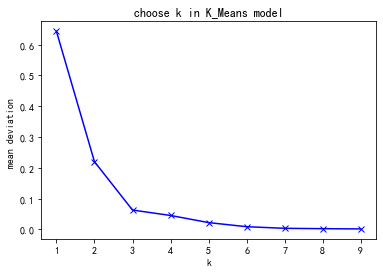

In [33]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(K,meanDispersions,'bx-')
plt.xlabel('k')
plt.ylabel('mean deviation ')
plt.title('choose k in K_Means model')
plt.show()

In [34]:
X = np.array(urls.loc[:,['Close_Match', 'Distance', 'Suffix_num']])
Y = np.array(urls['domain'])
C = np.array(urls['Close_Match'])
D = np.array(urls['Distance'])
S = np.array(urls['Suffix_num'])

In [35]:
kmeans = KMeans(n_clusters = 5)
result = kmeans.fit_predict(X)
print (result)
cm = [i[0] for i in X]  #close_match
dis = [i[0] for i in X] #distance
sn = [i[0] for i in X]  #suffix_num

[0 1 0 ... 2 0 1]


In [36]:
len(result)

5064

In [37]:
import collections
data_count = collections.Counter(result)

In [38]:
data_count

Counter({0: 2649, 1: 1786, 2: 509, 3: 59, 4: 61})

In [39]:
df = pd.DataFrame(columns=['domain','label'])
df['domain'] = Y
df['label'] = result
df['Close_Match'] = C
df['Distance'] = D
df['Suffix_Number'] = S

In [40]:
risk = df[df['label'] == 3]

In [41]:
risk

,domain,label,Close_Match,Distance,Suffix_Number
53,wip.town,3,0,1,1
256,amk.systems,3,0,1,1
542,ssy.org.uk,3,0,1,2
592,kgs.farm,3,0,1,1
631,aiva.info,3,0,1,1
767,wpb.financial,3,0,1,1
794,salesforces.cloud,3,0,1,1
847,jig.global,3,0,1,1
973,dcu.co.in,3,0,1,2
980,xig.biz,3,0,1,1


In [42]:
urls

,domain,Domain_Word,Suffix_num,Word,Similar_Word,Distance,Close_Match
20,byteholdings.com,byteholdings,1,set(),hsbcholdings,4,0
56,jomasagroup.com,jomasagroup,1,set(),compassgroup,3,0
118,asos.lat,asos,1,set(),marstons,4,0
124,mjlawgroup.com,mjlawgroup,1,set(),mangroup,3,0
183,nexafact.com,nexafact,1,set(),next,4,0
...,...,...,...,...,...,...,...
121627,erweb.info,erweb,1,set(),deere,4,0
121642,kewangroup.com,kewangroup,1,set(),mangroup,3,0
121650,tesl.online,tesl,1,set(),tesco,2,0
121663,querek.net,querek,1,set(),quilter,4,0


DBSCAN

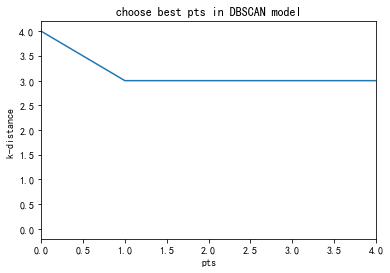

In [43]:
from sklearn.cluster import DBSCAN
# we draw k-distance graph to find the best eps
def select_Minpts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i]- data )**2).sum(axis = 1)**0.5)
        dist.sort()
        temp =0
        for i in range(k):
            temp = temp+ dist[i]
        k_dist.append(temp)
    return np.array(k_dist)

k = 5 #2*number of dimension -1
X = np.array(urls.loc[:,['Close_Match', 'Distance','Suffix_num']])
Y = np.array(urls['domain'])
C = np.array(urls['Close_Match'])
D = np.array(urls['Distance'])
S = np.array(urls['Suffix_num'])
k_dist = select_Minpts(X,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('pts')
plt.ylabel('k-distance ')
plt.title('choose best pts in DBSCAN model')
plt.xlim(0, 4)
plt.show()

In [44]:
dbscan_model = DBSCAN(eps = 0.9,min_samples=4)
label = dbscan_model.fit_predict(X)
print(label)

[0 1 0 ... 2 0 1]


In [45]:
DB_data_count = collections.Counter(label)

In [46]:
DB_data_count

Counter({0: 2647, 1: 1750, 2: 491, 3: 35, 4: 55, 5: 61, -1: 10, 6: 15})

In [47]:
db_df = pd.DataFrame(columns=['domain','label'])
db_df['domain'] = Y
db_df['label'] = label
db_df['Close_Match'] = C
db_df['Distance'] = D
db_df['Suffix_Number'] = S

In [48]:
risk = db_df[db_df['label'] == -1]

In [49]:
risk

,domain,label,Close_Match,Distance,Suffix_Number
542,ssy.org.uk,-1,0,1,2
649,int41.xyz,-1,1,2,1
737,int81.xyz,-1,1,2,1
973,dcu.co.in,-1,0,1,2
1312,eco10.net,-1,1,4,1
1402,johnson.properties,-1,0,0,1
1733,1ind.com,-1,1,2,1
2106,vmware.cc,-1,0,0,1
3927,buli1.xyz,-1,1,3,1
5017,220proctor.com,-1,1,4,1


In [50]:
len(risk)

10